<h2> Importing the dependencies 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<h2> Data Collection and analysis </h2>

In [2]:
# Loading the dataset from a csv file
insurance_dataset = pd.read_csv('C:/Users/hakim/OneDrive/Bureau/ENSI/ML Projects/Medical Insurance Cost Prediction/insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
# Information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<h3> Categorical Features </h3>
<ul>   
    <li> Sex </li>
    <li> Smoker </li>
    <li> Region </li>
</ul>

<h2> Data analysis </h2>

In [7]:
# Statistial measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\users\hakim\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


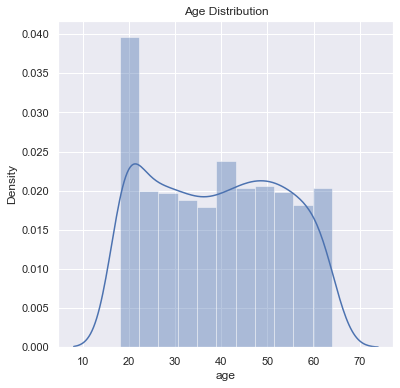

In [12]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

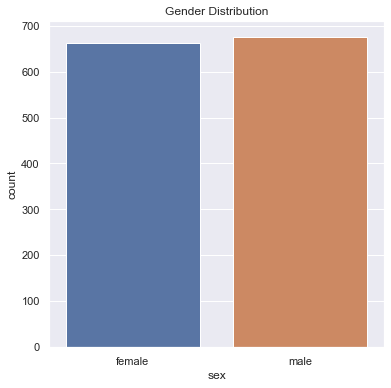

In [13]:
# Distribution for the gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insurance_dataset)
plt.title('Gender Distribution')
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

c:\users\hakim\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


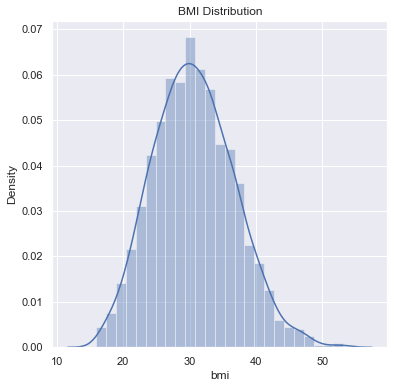

In [17]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

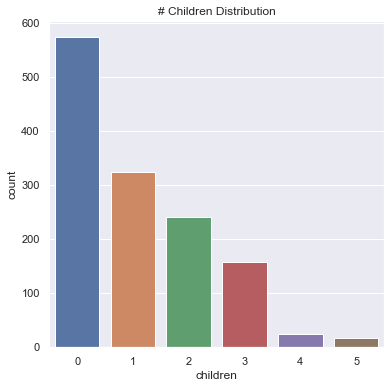

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [19]:
# Distribution for the Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data = insurance_dataset)
plt.title('# Children Distribution')
plt.show()
insurance_dataset['children'].value_counts()

<h2> Data Pre-processing </h2>

<h5> Encoding the data </h5>

In [37]:
#Encoding the data 
insurance_dataset.replace({'sex':{'male':1,'female':0}},inplace = True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace= True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace= True)
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


<h2> Defining the features and target </h2>

In [39]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

<h2> Splitting the data into Training and Test Data </h2>

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

<h5> Model Training Using a Linear Regression Model</h5>

In [45]:
# Loading the Linear Regression Model
regressor = LinearRegression()

In [46]:
regressor.fit(X_train,Y_train)

LinearRegression()

<h5> Model Evaluation </h5>

In [47]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [49]:
# R Squarred Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squarred Value = ',r2_train)

R Squarred Value =  0.751505643411174


In [50]:
test_data_prediction = regressor.predict(X_test)

In [51]:
# R Squarred Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squarred Value = ',r2_test)

R Squarred Value =  0.7447273869684077


<h2> Building a predictive System </h2>

In [60]:
#Data to be predicted [25,male,26.22,0,no,northeast,2721.3208]
input_data = (25,1,26.22,0,1,2)

#Changing input_data to a numpy array
input_data_as_arr = np.asarray(input_data)

#Reshape the array
input_data_reshaped = input_data_as_arr.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print ('Actual Price : 2721.3208, Predicted price : ',int(prediction))
print ('Prediction Accuarcy for the value chosen : ', 2721.3208/int(prediction))

Actual Price : 2721.3208, Predicted price :  2834
Prediction Accuarcy for the value chosen :  0.9602402258292166


c:\users\hakim\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
